# 导入数据

In [32]:
import glob
import pandas as pd

dir = r'D:/huigang39_lib/tmp/'
file_paths = glob.glob(dir + '*.txt')
data = []
file_names = []

for file_path in file_paths:
    file_name = file_path.replace("\\", "/").split('/')[-1].split('.')[0]
    file_names.append(file_name)
    df = pd.read_table(file_path)
    data.append(df)

# 数据清洗

In [33]:
for i in range(len(data)):
    data[i] = data[i].rename(columns={"# Time [sec]": "Time [sec]"})
    data[i] = data[i].drop(df.index[0])
    data[i] = data[i].reset_index(drop=True)
    data[i] = data[i].astype(float)

    start_index = 0
    end_index = len(data[i])

    while data[i].iloc[start_index]["M1Foc.PositionSetDeg"] == 0:
        start_index += 1

    while data[i].iloc[end_index-1]["M1Foc.PositionSetDeg"] == 0:
        end_index -= 1

    data[i] = data[i].iloc[start_index:end_index]

# 绘图

C:\Users\huigang39\AppData\Local\Temp\ipykernel_11328\420964632.py:35: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\huigang39\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


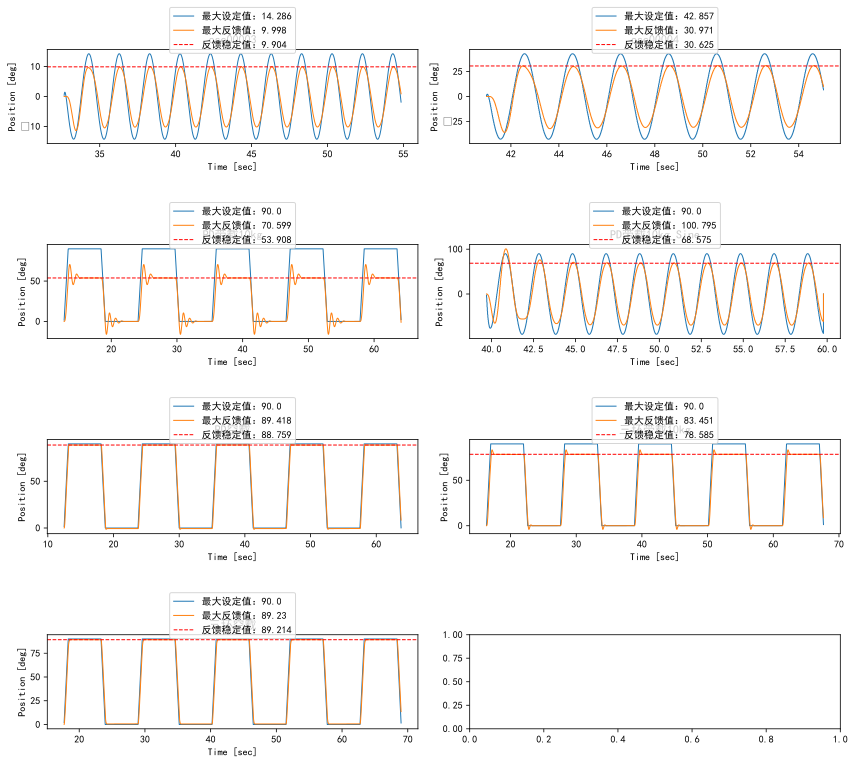

In [34]:
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

ratio = 7

fig, axes = plt.subplots(4, 2, figsize=(12, 11))  # Increase the figsize parameter to enlarge the plot

for i in range(len(data)):
    ax = axes[i // 2, i % 2]
    ax.plot(data[i]["Time [sec]"], data[i]["M1Foc.PositionSetDeg"] / ratio, linewidth=1)
    ax.plot(data[i]["Time [sec]"], data[i]["M1Foc.PositionFdbkDeg"] / ratio, linewidth=1)
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Position [deg]')

    file_name = file_names[i]
    ax.set_title(f'{file_name}')

    max_set_deg = round(data[i]["M1Foc.PositionSetDeg"].max() / ratio, 3)
    max_fdbk_deg = round(data[i]["M1Foc.PositionFdbkDeg"].max() / ratio, 3)

    stable_start_index = 0
    stable_end_index = len(data[i])

    while round(data[i].iloc[stable_end_index-1]["M1Foc.PositionSetDeg"] / ratio, 3) != max_set_deg:
        stable_end_index -= 1

    stable_value = round(data[i]["M1Foc.PositionFdbkDeg"].iloc[stable_end_index-1] / ratio, 3)
    ax.axhline(y=stable_value, color='r', linestyle='--', label=f'稳定值：{stable_value}', linewidth=1)

    ax.legend([f'最大设定值：{max_set_deg}', f'最大反馈值：{max_fdbk_deg}', f'反馈稳定值：{stable_value}'], loc='upper center', bbox_to_anchor=(0.5, 1.50), ncol=1)

plt.tight_layout()
plt.show()

In [35]:
import glob
import pandas as pd

dir = r'D:/huigang39_lib/test/'
file_paths = glob.glob(dir + '*.txt')
data = []
file_names = []

for file_path in file_paths:
    file_name = file_path.replace("\\", "/").split('/')[-1].split('.')[0]
    file_names.append(file_name)
    df = pd.read_table(file_path)
    data.append(df)

for i in range(len(data)):
    data[i] = data[i].rename(columns={"# Time [sec]": "Time [sec]"})
    data[i] = data[i].drop(df.index[0])
    data[i] = data[i].reset_index(drop=True)
    data[i] = data[i].astype(float)

%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

ratio = 7

for i in range(len(data)):
    plt.plot(data[i]["Time [sec]"], data[i]["M1Foc.PositionSetDeg"] / ratio, linewidth=1)
    plt.plot(data[i]["Time [sec]"], data[i]["M1Foc.PositionFdbkDeg"] / ratio, linewidth=1)
    plt.xlabel('Time [sec]')
    plt.ylabel('Position [deg]')

    file_name = file_names[i]
    plt.title(f'{file_name}')

    max_set_deg = round(data[i]["M1Foc.PositionSetDeg"].max() / ratio, 3)
    max_fdbk_deg = round(data[i]["M1Foc.PositionFdbkDeg"].max() / ratio, 3)

    plt.legend([f'最大设定值：{max_set_deg}', f'最大反馈值：{max_fdbk_deg}'], loc='upper right')

    plt.show()